# Synthetic measurements

For a better comparison of the simulation output with measurements taken during EUREC<sup>4</sup>A forward operators have been applied to some output variables. In the following the resulting products are presented.

## Radar measurements

As pointed out in {doc}`cloudmasks` defining the boundaries of a cloud is not an easy task and depends a lot on the used instrument. How to compare these measurements with the simulation output then? In the following, we use the [PAMTRA radar forward operator](https://github.com/igmk/pamtra) {cite:p}`Mech:2020` to create synthetic radar measurements from the simulation output that can be more quantitatively be compared to the actual measurements.

The synthetic radar data is available through the EUREC<sup>4</sup>A Intake catalog and available for all meteogram locations, model experiments and domains.

### Comparison with observations

In [1]:
import numpy as np
import datetime as dt
import eurec4a
import matplotlib.pyplot as plt
from matplotlib import dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use(["./mplstyle/book", "./mplstyle/wide"])
cat = eurec4a.get_intake_catalog()

#### Selecting a specific synthetic radar location, in this case at the BCO.

In [2]:
#Synthetic
ds_syn = cat.simulations.ICON.LES_CampaignDomain_control.synthetic_radar_BCO_DOM01.to_dask()
#Observations
ds_obs = cat.barbados.bco.radar_reflectivity.to_dask()

#### Plotting timeseries

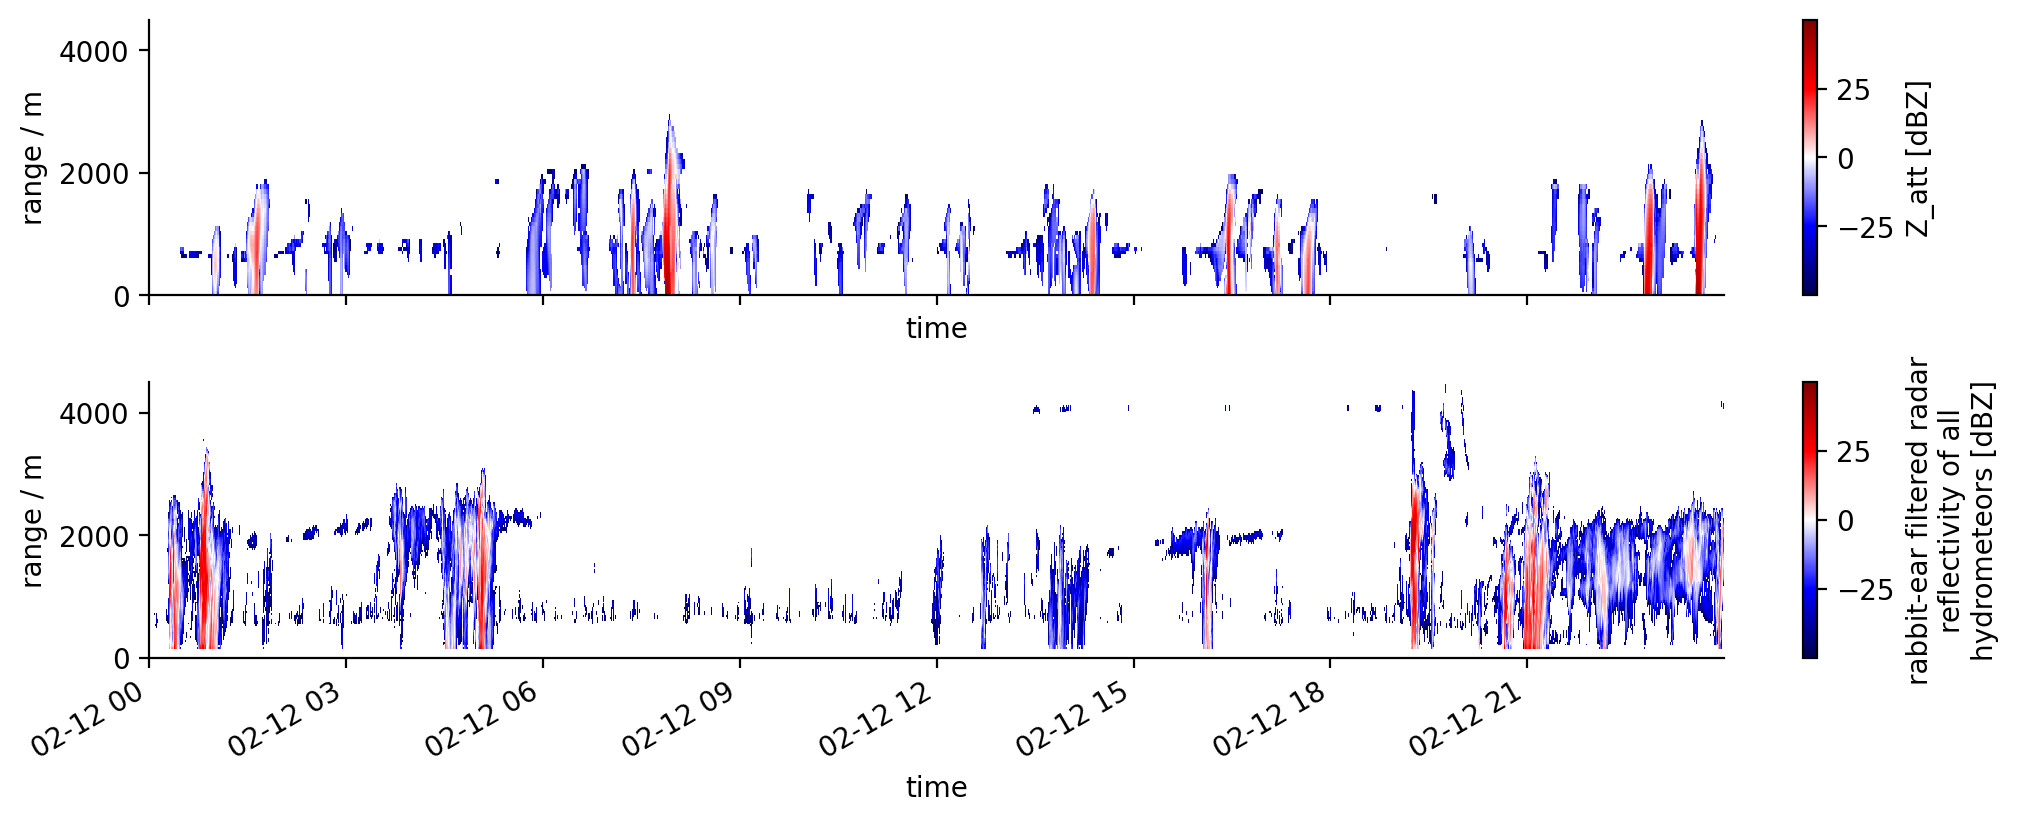

In [3]:
time_min = np.datetime64('2020-02-12T00:00:00')
time_max = np.datetime64('2020-02-12T23:59:59')

# selecting subset of data
ds_sliced_syn = ds_syn.sel(time=slice(time_min, time_max))
ds_sliced_obs = ds_obs.sel(time=slice(time_min, time_max))

fig, axs = plt.subplots(2,1, sharex=True, sharey=True)
ds_sliced_syn.Z_att.where(ds_sliced_syn.Z_att > -50).plot(x='time', y='height', cmap="seismic", ax=axs[0])
ds_sliced_obs.Zf.where(ds_sliced_obs.Zf > -50).plot(x='time', y='range', cmap="seismic", ax=axs[1])
axs[0].set_ylabel('range / m');
axs[1].set_xlim(time_min, time_max)
axs[1].set_ylim(0, 4500);
axs[1].set_ylabel('range / m');

To have a similar sensitivity and exclude reflectivities originating from sea-salt (which are not captured by the simulations and therefore the forward operator) a reflecitivy threshold of -50 dBZ is applied to both sources.